In [1]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# <center>Jupyter Notebook Mastery - Resit exam</center>

# PART ONE - WORKING WITH DATA

You are provided with a dataset which contains different characteristics Spotify songs. You should achieve the following goals:

- find out who are the top 10 artists by number of songs, 
- find out what are the top 10 most streamed songs, 
- explore songs danceability over the years.

You will find cells named `TASK`. They define what task you should perform. Under each task you will find a cell, containing the comment _#YOUR CODE HERE_ in which you should write your solution.

**Good luck!** :)

# METADATA
track_name: Name of the song <br>
artist(s)_name: Name of the artist(s) of the song <br>
artist_count: Number of artists contributing to the song <br>
released_year: Year when the song was released <br>
released_month: Month when the song was released <br>
released_day: Day of the month when the song was released <br>
in_spotify_playlists: Number of Spotify playlists the song is included in <br>
in_spotify_charts: Presence and rank of the song on Spotify charts <br>
streams: Total number of streams on Spotify <br>
in_apple_playlists: Number of Apple Music playlists the song is included in <br>
in_apple_charts: Presence and rank of the song on Apple Music charts <br>
in_deezer_playlists: Number of Deezer playlists the song is included in <br>
in_deezer_charts: Presence and rank of the song on Deezer charts <br>
in_shazam_charts: Presence and rank of the song on Shazam charts <br>
bpm: Beats per minute, a measure of song tempo <br>
key: Key of the song <br>
mode: Mode of the song (major or minor) <br>
danceability_%: Percentage indicating how suitable the song is for dancing <br>
valence_%: Positivity of the song's musical content <br>
energy_%: Perceived energy level of the song <br>
acousticness_%: Amount of acoustic sound in the song <br>
instrumentalness_%: Amount of instrumental content in the song <br>
liveness_%: Presence of live performance elements <br>
speechiness_%: Amount of spoken words in the song <br>

## Reading the data

<b><font color='#8B0000'>TASK</font></b>

Read the dataset as a Pandas dataframe and show the **first three rows** of it.

Note: You have to read the dataset with **encoding='ISO-8859-1'**

Store the dataset in the variable `spotify_data`.

In [2]:
#YOUR CODE HERE
spotify_data = pd.read_csv("./data/spotify-2023.csv", encoding="latin-1")
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Check the structure of the dataset
<b><font color='#8B0000'>TASK</font></b>

Present the number of rows and number of columns in the dataset in the following format:<br><br> "Number of rows: {rows}, number of columns: {columns}"

In [3]:
#YOUR CODE HERE
rows, columns = spotify_data.shape
output = f"Number of rows: {rows}, number of columns: {columns}"
print(output)

Number of rows: 953, number of columns: 24


# Find missing values

<b><font color='#8B0000'>TASK</font></b>

Present the **columns** containing missing values and the respective **count of missing values** in each column.

In [4]:
#YOUR CODE HERE
cols_with_missing = spotify_data.columns[spotify_data.isna().any()]
missing_values_count = spotify_data[cols_with_missing].isna().sum()
for col, count in missing_values_count.items():
    print(f"{col}: {count}")

in_shazam_charts: 50
key: 95


# Fix data types

<b><font color='#8B0000'>TASK</font></b>

Turn non-numeric values from 'streams' column to numeric.

Note: You might need to use **errors='coerce'** in the pd.to_numeric function.

In [5]:
#YOUR CODE HERE
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


# Find Top 10 artists

<b><font color='#8B0000'>TASK</font></b>

Create a variable `top_artists` which contains the **top 10** artists by the **number of times** they appear in the dataset (number of songs).

In [6]:
#YOUR CODE HERE
top_artists = spotify_data['artist(s)_name'].value_counts().head(10)
top_artists

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64

<b><font color='#8B0000'>TASK</font></b>

Create a **horizontal bar plot** which presents the Top 10 artists and their respective number of songs.

***REQUIREMENTS:***
- figure DPI should be **140**
 - figure size should be **(7, 5)**
 - figure title should be **'Top 10 artists by number of songs'**
 - x label should be **'Number of songs'**
 - y label should be **'Artists'**
 - top artists should be at the top of the bar plot, bottom artist should be at the bottom

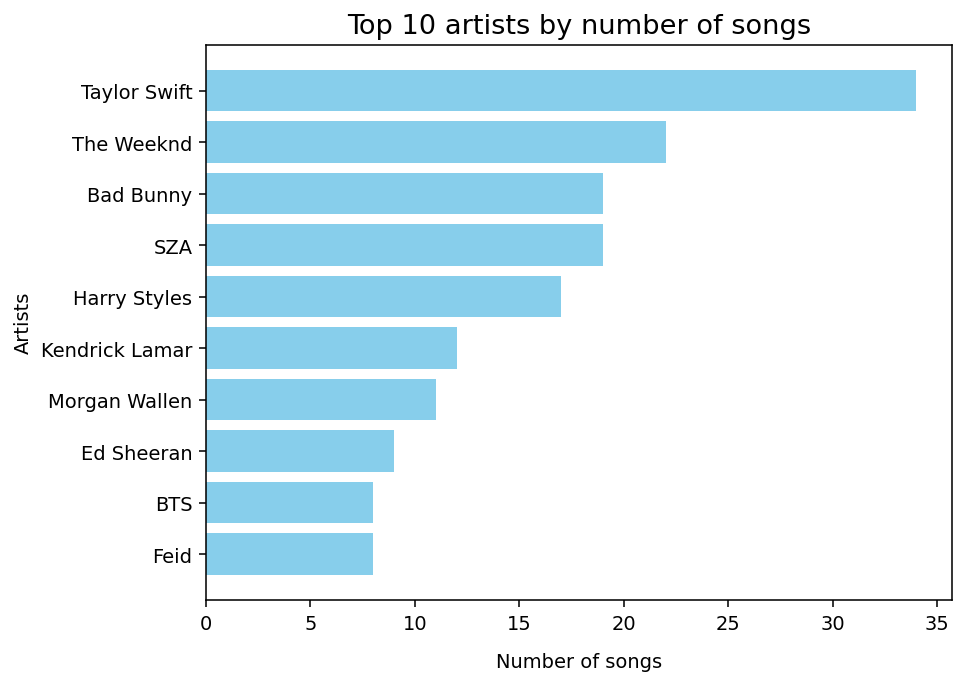

In [7]:
#YOUR CODE HERE
plt.figure(dpi=140, figsize=(7, 5))
plt.barh(top_artists.index, top_artists.values, color='skyblue')

plt.xlabel('Number of songs', labelpad=10)
plt.ylabel('Artists')

plt.title('Top 10 artists by number of songs', fontsize=14)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Find Top 10 most streamed songs

<b><font color='#8B0000'>TASK</font></b>

Create a variable `top_spotify_streams` which contains a DataFrame with top 10 most streamed songs on Spotify. The DataFrame should contain 3 columns - 'track_name', 'artist(s)_name' and 'streams'.

In [8]:
#YOUR CODE HERE
top_spotify_streams = spotify_data.sort_values(by='streams', ascending=False).head(10)

top_spotify_streams = top_spotify_streams[['track_name', 'artist(s)_name', 'streams']]

top_spotify_streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


<b><font color='#8B0000'>TASK</font></b>

Create a **horizontal bar plot** which presents the Top 10 most streamed songs

***REQUIREMENTS:***
- figure DPI should be **130**
 - figure size should be **(7, 5)**
 - figure title should be **'Top 10 most streamed songs'**
 - x label should be **'Number of streams (in billions)'**
 - y label should be **'Song name'**
 - top song should be on the top of the bar plot, bottom song at the bottom

In [9]:
top_spotify_streams['streams_formatted'] = (
    top_spotify_streams['streams'] / 1_000_000_000
).apply('{:.2f} billion'.format)

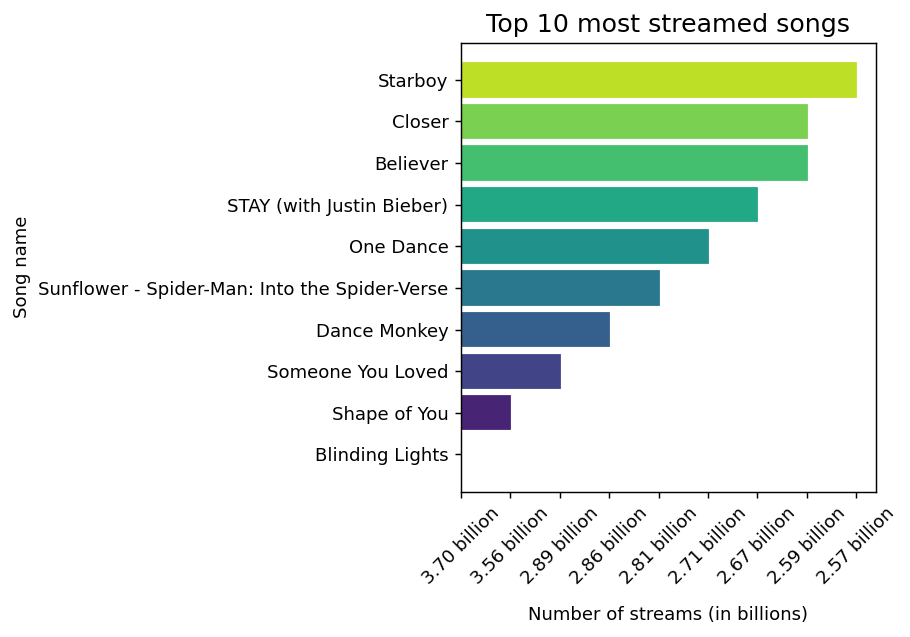

In [10]:
#YOUR CODE HERE

plt.figure(dpi=130, figsize=(7, 5))
bars = plt.barh(top_spotify_streams['track_name'], top_spotify_streams['streams_formatted'], color='lightcoral')
plt.xlabel('Number of streams (in billions)', labelpad=10)
plt.ylabel('Song name')
plt.xticks(rotation=45) # For better view

plt.title('Top 10 most streamed songs', fontsize=14)


for i, bar in enumerate(bars):
    bar.set_color(plt.cm.viridis(i / len(bars)))

plt.tight_layout()
plt.show()

# Explore danceability

<b><font color='#8B0000'>TASK</font></b>

Create a **histogram** which presents the distribution of the the variable 'danceability_%'.

***REQUIREMENTS:***
- figure DPI should be **140**
 - figure size should be **(10, 6)**
 - the histogram should have **20 bins**
 - bins should be colored in **'purple'**
 - figure title should be **'Distribution of Danceability'**
 - x label should be **'Danceability (%)'**
 - y label should be **'Frequency'**


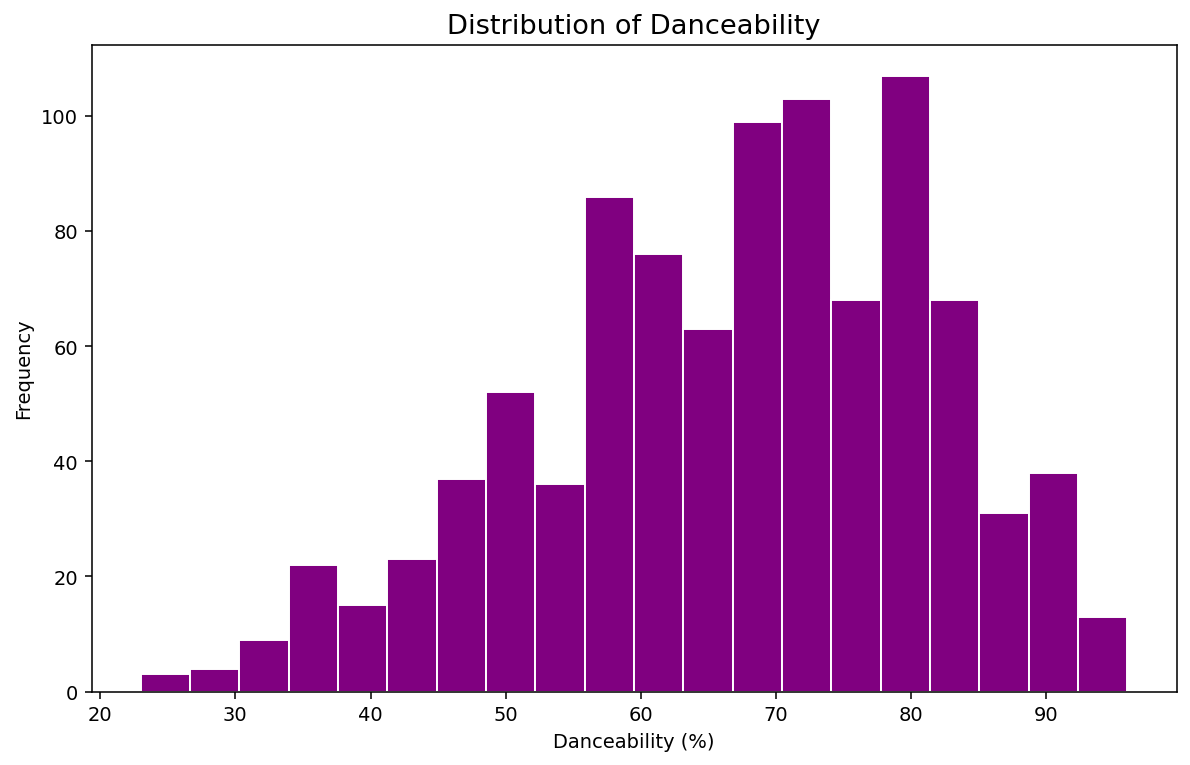

In [11]:
#YOUR CODE HERE
bins = 20

plt.figure(dpi=140, figsize=(10, 6))
plt.hist(spotify_data['danceability_%'], bins=bins, color='purple', edgecolor='white')

plt.xlabel('Danceability (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability', fontsize=14)

plt.show()

<b><font color='#8B0000'>TASK</font></b>

Create a variable `average_danceability_by_year` which stores the **average danceability per year**.

In [12]:
#YOUR CODE HERE
average_danceability_by_year = spotify_data.groupby('released_year')['danceability_%'].mean()

<b><font color='#8B0000'>TASK</font></b>

Create a **line plot** which presents average danceability over the years.

***REQUIREMENTS:***
- figure DPI should be **140**
 - figure size should be **(10, 6)**
 - figure title should be **'Trends in Danceability Over the Years'**
 - x tick should be rotated at **45 degrees**
 - x label should be **'Year'**
 - y label should be **'Average Danceability (%)'**
 - color of the line should be 'blue'


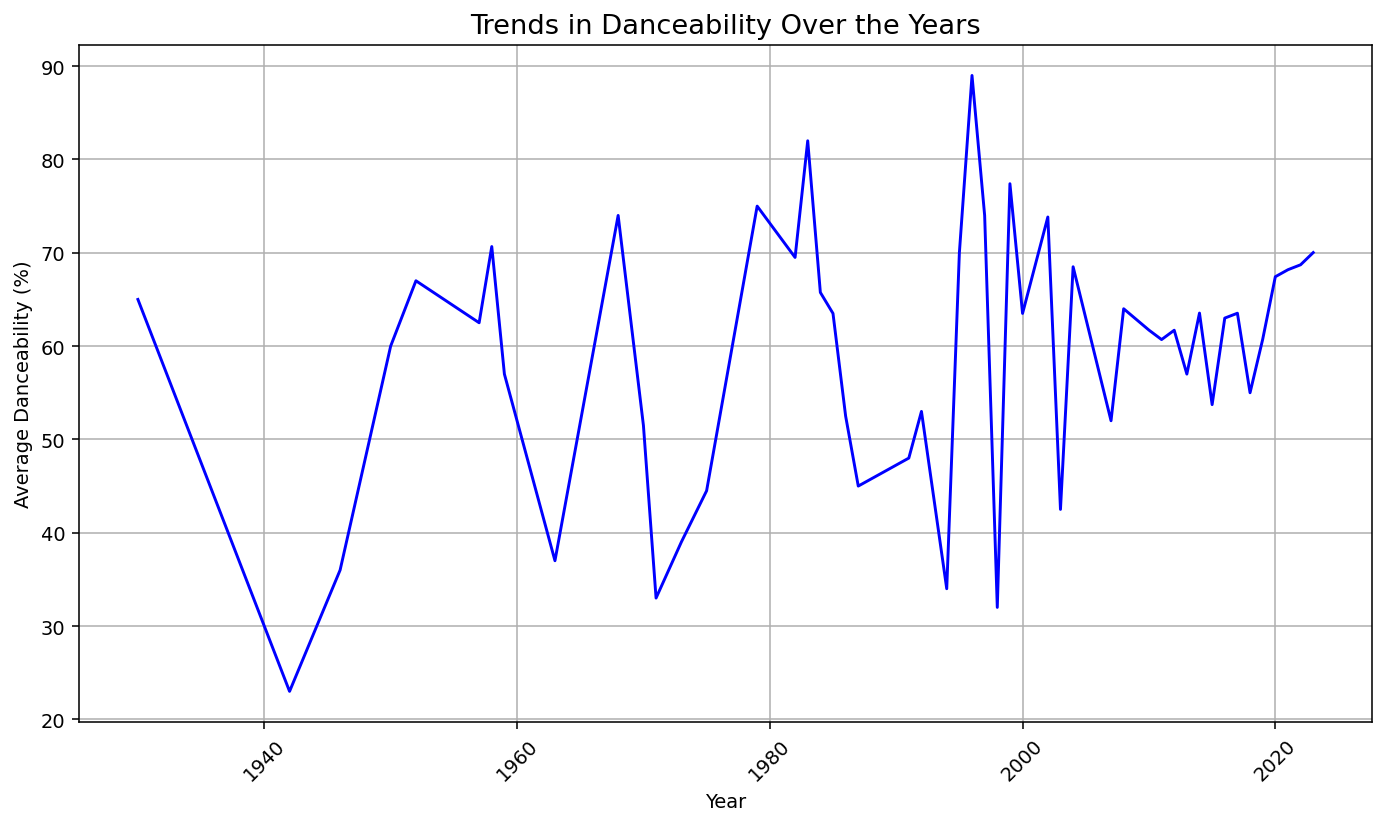

In [13]:
#YOUR CODE HERE
plt.figure(dpi=140, figsize=(10, 6))
plt.plot(average_danceability_by_year.index, average_danceability_by_year, color='blue')

plt.xticks(rotation=45)

plt.xlabel('Year')
plt.ylabel('Average Danceability (%)')
plt.title('Trends in Danceability Over the Years', fontsize=14)  # Title


plt.grid(True)

plt.tight_layout()
plt.show()

# PART TWO - WORKING WITH TEXT

Underneath you will find raw text which you should format according to the given final version of the text. Please, input your final, formatted text, in the last cell of the notebook denoted with the comment _#YOUR FINAL TEXT HERE_.

### Raw text

Spotify is a Swedish audio streaming and media services provider founded on 23 April 2006 by Daniel Ek and Martin Lorentzon. It is one of the largest music streaming service providers, with over 590 million monthly active users, including 226 million paying subscribers, as of September 2023. Spotify is listed on the New York Stock Exchange in the form of American depositary receipts.

Spotify offers digital copyright restricted recorded audio content, including more than 100 million songs and five million podcasts, from record labels and media companies. As a freemium service, basic features are free with advertisements and limited control, while additional features, such as offline listening and commercial-free listening, are offered via paid subscriptions. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.

As of December 2023, Spotify was the 47th most-visited website in the world with 24.78% of its traffic coming from the United States followed by Brazil with 6.51% according to data provided by Semrush here (insert the following hyperlink https://www.semrush.com/trending-websites/global/all).

### Final text - example

![image](data/final_text_example_2.png)

### YOUR FINAL TEXT HERE
<b>Spotify</b> is a Swedish audio streaming and media services provider founded on 23 April 2006 by <i>Daniel Ek and Martin Lorentzon</i>. It is <u>one of the largest</u> music streaming service providers, with <b>over</b> 590 million monthly active users, including 226 million paying subscribers, as of September 2023. Spotify is listed on the New York Stock Exchange in the form of American depositary receipts.

Spotify offers digital <u>copyright restricted</u> recorded audio content, including more than 100 million songs and five million podcasts, from record labels and media companies. As a <b>freemium</b> service, basic features are free with advertisements and limited control, while additional features, such as offline listening and commercial-free listening, are offered via <b>paid subscriptions</b>. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.

As of December 2023, Spotify was the <b>47th most-visited website</b> in the world with 24.78% of its traffic coming from the United States followed by Brazil with 6.51% according to data provided by Semrush [here](https://www.semrush.com/trending-websites/global/all) .